## Setting up

In [6]:
from numpy import (
    linspace, array, arange, diff, pi, abs as nabs, sin, zeros, cos, exp, 
    set_printoptions, inf
    )
set_printoptions(linewidth=500)
from numpy.linalg import norm
from numpy.fft import fftshift, ifftshift, fftfreq
from scipy.integrate import quad
from scipy.fftpack import fft

from matplotlib.style import use
use("seaborn")

from pltconfig import *

%matplotlib inline

# Problem 2

## Part B

### Analyzing the first function: $u(x) = \frac{3}{5-4\cos(x)}$

In [7]:
def func1(x):
    return 3./(5.0-4.0*cos(x))

def func1_integrate(x,k):
    return (1./(2*pi))*(3./(5.0-4.0*cos(x)))*exp(-1j*k*x)

def func1_coeffs(k):
    return 2.0**(-nabs(k))

In [8]:
class q2b1(object):
    
    def __init__(self, N):
        
        # unload the variables
        self.N = N
        
        # compute derived variables
        self.xj = linspace(0.0,2*pi-(2*pi/self.N),self.N)
        self.ks = arange(-(self.N//2)+1,(self.N//2)+1)
        
        self.actual = func1_coeffs(self.ks)
        
        self.exact_coeffs = func1_coeffs(self.ks)
        self.integral_coeffs = self.calc_coeff_integral()
        self.fft_coeffs = self.calc_coeff_fft()
                
    def calc_coeff_integral(self):
        
        # compute uhat_{k}
        
        integral_coeffs = array(
            [quad(func1_integrate, a=0.0, b=2*pi, args=(kval,))[0] for kval in self.ks]
        )
        
        return integral_coeffs
        
    def calc_coeff_fft(self):
        
        f1 = func1(self.xj)
        
        return (1./self.N)*fftshift(fft(f1))

In [9]:
def plot_function_interpolant_func1():
        
        # set up plot
        fig, ax = subplots(1,1, figsize=(10,10))
        
        # very fine grid for plotting
        fine_xj = linspace(0.0, 2*pi, 100)
        
        for i, N in enumerate([4, 8, 16, 32]):
            
            # generate object
            obj = q2b1(N=N)
            
            uj = func1(obj.xj)
        
            # compute the interpolant 
            In = (obj.fft_coeffs[:,None]*exp(1j*(obj.ks-1)[:,None]*fine_xj[None,:])).sum(axis=0)
            
            ax.plot(obj.xj, uj, "o", lw=3.0, color=f"C{i}", label=f"{N}")
            ax.plot(fine_xj, In, ":", lw=3.0, color=f"C{i}")
            
        ax.legend(loc=0, prop={"size": 14})
        ax.set_ylabel(r"$u_{1}(x)$", fontsize=28)
        ax.set_xlabel(r"$x$", fontsize=28)
        ax.tick_params(labelsize=24)
        
        fig.tight_layout()  
        fig.savefig("q2b_func1_interpolant_figure.pdf")

/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


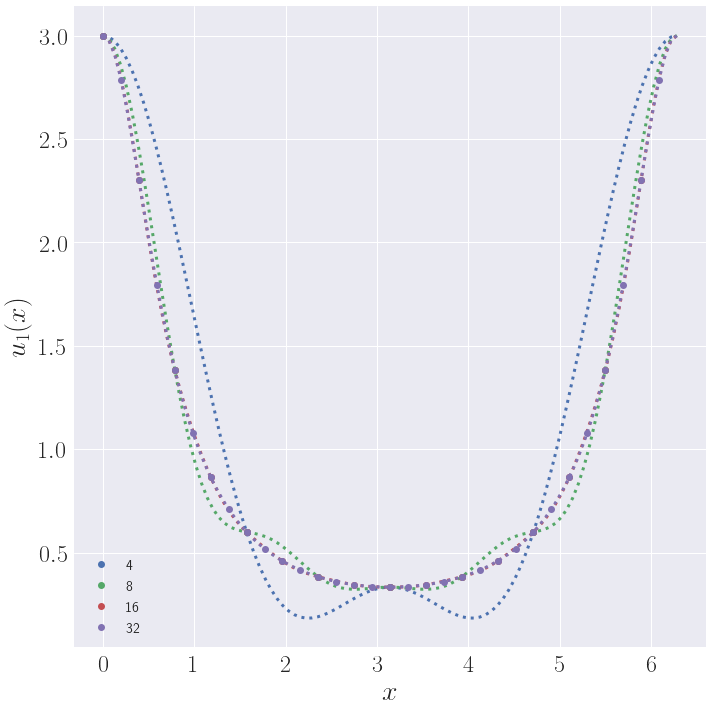

In [10]:
plot_function_interpolant_func1()

In [11]:
def plot_function_interpolant_truncation_func1():
        
        # set up plot
        fig, ax = subplots(1,1, figsize=(10,10))
        
        # very fine grid for plotting
        fine_xj = linspace(0.0, 2*pi, 100)
        
        for i, N in enumerate([4, 8]):
            
            # generate object
            obj = q2b1(N=N)
            
            uj = func1(obj.xj)
        
            # compute the interpolant 
            In = (obj.fft_coeffs[:,None]*exp(1j*(obj.ks-1)[:,None]*fine_xj[None,:])).sum(axis=0)
            # compute the truncated fourier series
            Tn = (obj.integral_coeffs[:,None]*exp(1j*obj.ks[:,None]*fine_xj[None,:])).sum(axis=0)
            
            ax.plot(obj.xj, uj, "o", lw=3.0, color=f"C{i}", label=f"{N}")
            ax.plot(fine_xj, In, ":", lw=3.0, color=f"C{i}")
            ax.plot(fine_xj, Tn, "--", lw=3.0, color=f"C{i}")
            
        ax.legend(loc=0, prop={"size": 18})
        ax.set_ylabel(r"$u_{1}(x)$", fontsize=28)
        ax.set_xlabel(r"$x$", fontsize=28)
        ax.tick_params(labelsize=20)
        
        fig.tight_layout()   
        fig.savefig("q2b_func1_interpolant_truncation_figure.pdf")

/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


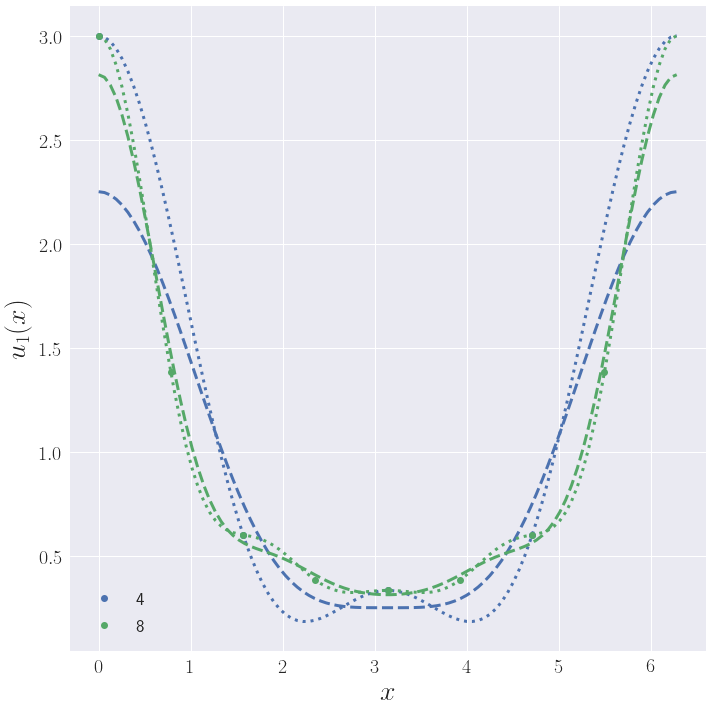

In [12]:
plot_function_interpolant_truncation_func1()

Confirming that $\hat{v}_{k} \neq \hat{u}_{k}$

In [13]:
N08_q2b1 = q2b1(N=8)
N32_q2b1 = q2b1(N=32)

# N08_q2b1.N//2-1:(N08_q2b1.N//2-1)+5

# reshift the array so that the zeroth mode is again first
# print the first 5 coefficients corresponding to the first 5 modes 
print("N = 8, vhat_k =", ifftshift(N08_q2b1.fft_coeffs).__abs__()[:5])
print("N = 8, uhat_k =", ifftshift(N08_q2b1.integral_coeffs)[:5])

N = 8, vhat_k = [1.00784314 0.50980392 0.26666667 0.15686275 0.1254902 ]
N = 8, uhat_k = [0.5    0.25   0.125  0.0625 0.125 ]


/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


Verifying numerically the aliasing formula for N = 8

In [14]:
m = arange(1, 10)
ks_sample = 3.0 + m*8

integral_coeffs = array(
    [quad(func1_integrate, a=0.0, b=2*pi, args=(kval,))[0] for kval in ks_sample]
    )

print(integral_coeffs)

[ 4.88281250e-04  1.90734863e-06  7.45058010e-09  2.91037836e-11  1.13992149e-13  4.26308294e-16 -1.42681006e-16 -2.19130812e-16  1.15077219e-15]


Computing the truncation and interpolation errors

In [15]:
def calc_truncation_interpolation_errors_func1():

    Nvals = 2.0**arange(2,9)
    interpolation_error_array = zeros(Nvals.size)
    truncation_error_array = zeros(Nvals.size)

    # very fine grid for plotting
    fine_xj = linspace(0.0, 2*pi, 100)

    for index, N in enumerate(Nvals):

        obj = q2b1(N=N)
        
        uj = func1(fine_xj)

        # compute the interpolant 
        In = (obj.fft_coeffs[:,None]*exp(1j*(obj.ks-1)[:,None]*fine_xj[None,:])).sum(axis=0)
        
        # compute the truncated fourier series
        Tn = (obj.integral_coeffs[:,None]*exp(1j*obj.ks[:,None]*fine_xj[None,:])).sum(axis=0)

        interpolation_error_array[index] = norm((uj-In).flatten(), ord=inf)
        truncation_error_array[index] = norm((uj-Tn).flatten(), ord=inf)
        
    fig, ax = subplots(1,1,figsize=(10,10))
    
    ax.plot(Nvals, interpolation_error_array, lw=3.0, label="Interpolation")
    ax.plot(Nvals, truncation_error_array, lw=3.0, label="Truncation")
    
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"$E(N)$", fontsize=28)
    ax.set_xlabel(r"$N$", fontsize=28)
    
    ax.tick_params(labelsize=24)
    
    ax.legend(loc=0, prop={"size":18})
    
    fig.tight_layout()
    
    fig.savefig("q2b_func1_trunc_interp_error_fig.pdf")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: IntegrationWarning: The integral is probably divergent, or slowly convergent.


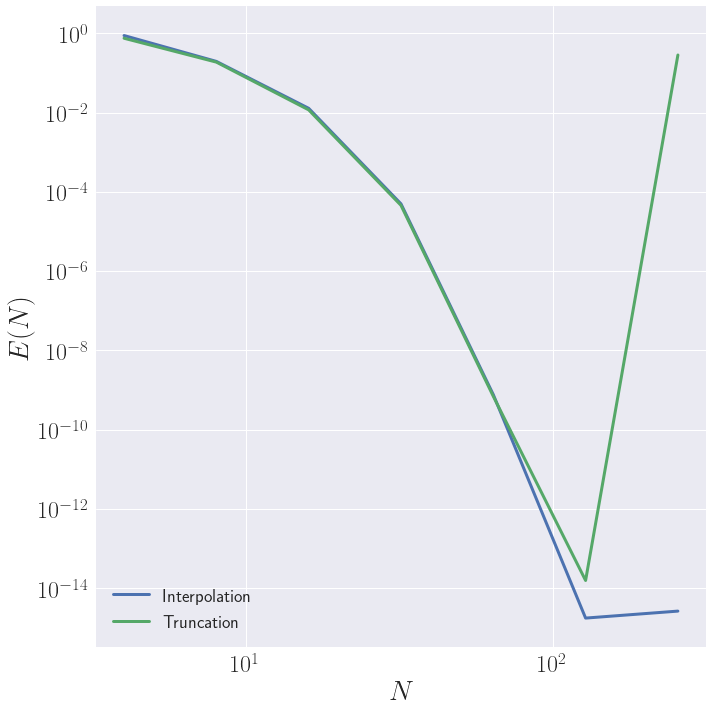

In [16]:
calc_truncation_interpolation_errors_func1()

### Analyzing the second function: $u(x) = \sin(x/2)$

In [17]:
def func2(x):
    return sin(0.5*x)

def func2_integrate(x,k):
    return (1./(2*pi))*(sin(0.5*x))*exp(-1j*k*x)

def func2_coeffs(k):
    return (2./pi)*(1./(1-4.0*k*k))

In [18]:
class q2b2(object):
    
    def __init__(self, N):
        
        # unload the variables
        self.N = N
        
        # compute derived variables
        self.xj = linspace(0.0,2*pi-(2*pi/self.N),self.N)
        self.ks = arange(-(self.N//2)+1,(self.N//2)+1)
        
        self.actual = func2_coeffs(self.ks)
        
        self.exact_coeffs = func2_coeffs(self.ks)
        self.integral_coeffs = self.calc_coeff_integral()
        self.fft_coeffs = self.calc_coeff_fft()
                
    def calc_coeff_integral(self):
        
        integral_coeffs = zeros(self.ks.size)
        
        for index, kval in enumerate(self.ks):
            integral_coeffs[index] = quad(func2_integrate, a=0.0, b=2*pi, args=(kval,))[0]
        
        return integral_coeffs
        
    def calc_coeff_fft(self):
        
        f2 = func2(self.xj)
        
        return (1./self.N)*fftshift(fft(f2))

In [19]:
def plot_function_interpolant_func2():
        
        # set up plot
        fig, ax = subplots(1,1, figsize=(10,10))
        
        # very fine grid for plotting
        fine_xj = linspace(0.0, 2*pi, 100)
        
        for i, N in enumerate([4, 8, 16, 32]):
            
            # generate object
            obj = q2b2(N=N)
            
            uj = func2(obj.xj)
        
            # compute the interpolant 
            In = (obj.fft_coeffs[:,None]*exp(1j*(obj.ks-1)[:,None]*fine_xj[None,:])).sum(axis=0)
            
            ax.plot(obj.xj, uj, "o", lw=3.0, color=f"C{i}", label=f"{N}")
            ax.plot(fine_xj, In, ":", lw=3.0, color=f"C{i}")
            
        ax.legend(loc=0, prop={"size": 14})
        ax.set_ylabel(r"$u_{2}(x)$", fontsize=28)
        ax.set_xlabel(r"$x$", fontsize=28)
        ax.tick_params(labelsize=24)
        
        fig.tight_layout()  
        fig.savefig("q2b_func2_interpolant_figure.pdf")   

/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


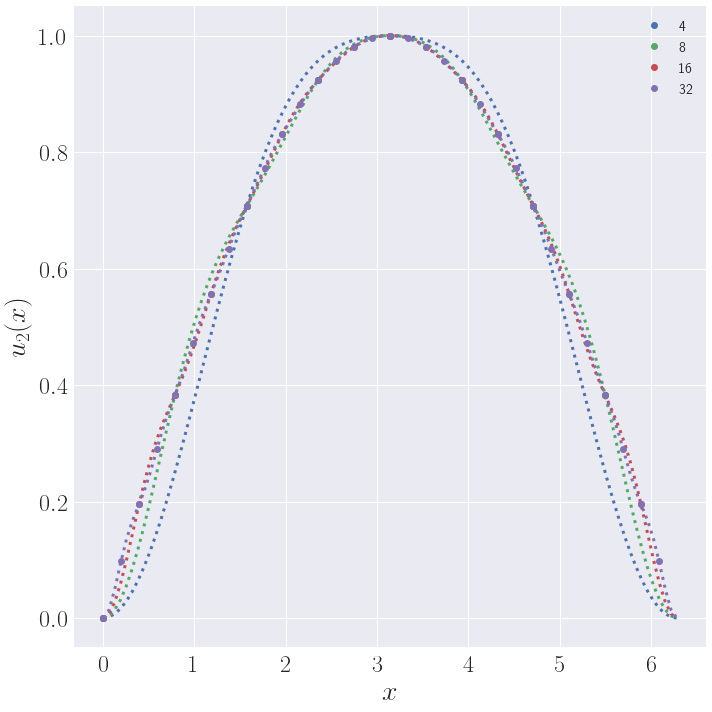

In [20]:
plot_function_interpolant_func2()

In [21]:
def plot_function_interpolant_truncation_func2():
        
        # set up plot
        fig, ax = subplots(1,1, figsize=(10,10))
        
        # very fine grid for plotting
        fine_xj = linspace(0.0, 2*pi, 100)
        
        for i, N in enumerate([4, 8]):
            
            # generate object
            obj = q2b2(N=N)
            
            uj = func2(obj.xj)
        
            # compute the interpolant 
            In = (obj.fft_coeffs[:,None]*exp(1j*(obj.ks-1)[:,None]*fine_xj[None,:])).sum(axis=0)
            # compute the truncated fourier series
            Tn = (obj.integral_coeffs[:,None]*exp(1j*obj.ks[:,None]*fine_xj[None,:])).sum(axis=0)
            
            ax.plot(obj.xj, uj, "o", lw=3.0, color=f"C{i}", label=f"{N}")
            ax.plot(fine_xj, In, ":", lw=3.0, color=f"C{i}")
            ax.plot(fine_xj, Tn, "--", lw=3.0, color=f"C{i}")
            
        ax.legend(loc=0, prop={"size": 18})
        ax.set_ylabel(r"$u_{2}(x)$", fontsize=28)
        ax.set_xlabel(r"$x$", fontsize=28)
        ax.tick_params(labelsize=20)
        
        fig.tight_layout()   
        fig.savefig("q2b_func2_interpolant_truncation_figure.pdf") 

/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


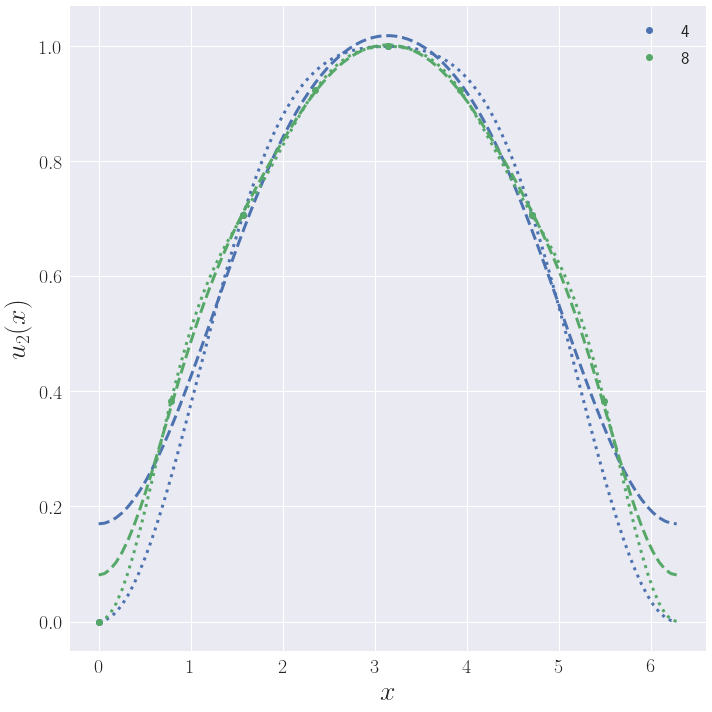

In [22]:
plot_function_interpolant_truncation_func2()

In [23]:
def calc_truncation_interpolation_errors_func2():

    Nvals = 2.0**arange(2,9)
    interpolation_error_array = zeros(Nvals.size)
    truncation_error_array = zeros(Nvals.size)

    # very fine grid for plotting
    fine_xj = linspace(0.0, 2*pi, 100)

    for index, N in enumerate(Nvals):

        obj = q2b2(N=N)
        
        uj = func2(fine_xj)

        # compute the interpolant 
        In = (obj.fft_coeffs[:,None]*exp(1j*(obj.ks-1)[:,None]*fine_xj[None,:])).sum(axis=0)
        
        # compute the truncated fourier series
        Tn = (obj.integral_coeffs[:,None]*exp(1j*obj.ks[:,None]*fine_xj[None,:])).sum(axis=0)

        interpolation_error_array[index] = norm((uj-In).flatten(), ord=inf)
        truncation_error_array[index] = norm((uj-Tn).flatten(), ord=inf)
        
    fig, ax = subplots(1,1,figsize=(10,10))
    
    ax.plot(Nvals, interpolation_error_array, lw=3.0, label="Interpolation")
    ax.plot(Nvals, truncation_error_array, lw=3.0, label="Truncation")
    
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"$E(N)$", fontsize=28)
    ax.set_xlabel(r"$N$", fontsize=28)
    
    ax.tick_params(labelsize=24)
    
    ax.legend(loc=0, prop={"size":18})
    
    fig.tight_layout()
    
    fig.savefig("q2b_func2_trunc_interp_error_fig.pdf")

/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


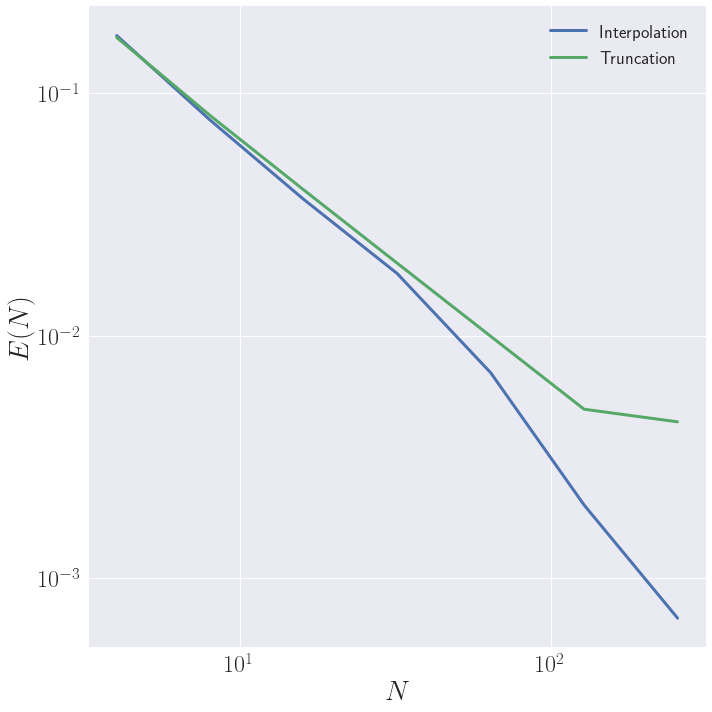

In [24]:
calc_truncation_interpolation_errors_func2()

### Analyzing the third function: $u(x) = \sin(32x)$

In [33]:
def func3(x):
    return sin(32*x)

def func3_integrate(x,k):
    return (1./(2*pi))*(sin(32*x))*exp(-1j*k*x)

In [46]:
class q2b3(object):
    
    def __init__(self, N):
        
        # unload the variables
        self.N = N
        
        # compute derived variables
        self.xj = linspace(0.0,2*pi-(2*pi/self.N),self.N)
        self.ks = arange(-(self.N//2)+1,(self.N//2)+1)
        
        self.integral_coeffs = self.calc_coeff_integral()
        self.fft_coeffs = self.calc_coeff_fft()
                
    def calc_coeff_integral(self):
        
        integral_coeffs = array(
            [quad(func3_integrate, a=0.0, b=2*pi, args=(kval,))[0] for kval in self.ks]
            )
        
        return integral_coeffs
        
    def calc_coeff_fft(self):
        
        f3 = func3(self.xj)
        
        return (1./self.N)*fftshift(fft(f3))

In [68]:
def plot_function_interpolant_func3():
        
        # set up plot
        fig, ax = subplots(1,1, figsize=(10,10))
        
        # very fine grid for plotting
        fine_xj = linspace(0.0, 2*pi, 100)
        
        for i, N in enumerate([4, 8, 16, 32]):
            
            # generate object
            obj = q2b3(N=N)
            
            uj = func3(obj.xj)
        
            # compute the interpolant 
            In = (obj.fft_coeffs[:,None]*exp(1j*(obj.ks-1)[:,None]*fine_xj[None,:])).sum(axis=0)
            
            ax.plot(obj.xj, uj, "o", lw=3.0, color=f"C{i}", label=f"{N}")
            ax.plot(fine_xj, In, ":", lw=3.0, color=f"C{i}")
            
        ax.legend(loc=0, prop={"size": 14})
        ax.set_ylabel(r"$u_{3}(x)$", fontsize=28)
        ax.set_xlabel(r"$x$", fontsize=28)
        ax.tick_params(labelsize=24)
        
        fig.tight_layout()  
        fig.savefig("q2b_func3_interpolant_figure.pdf")  

/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


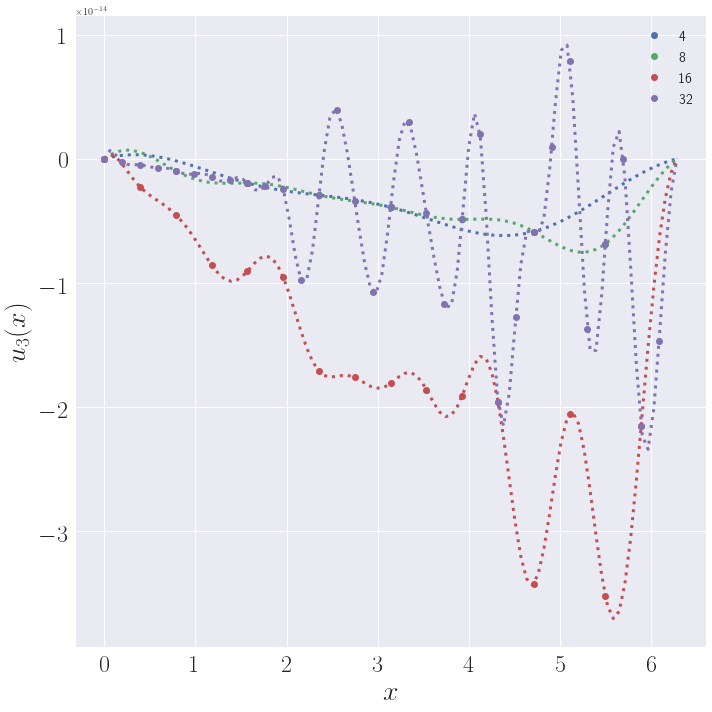

In [69]:
plot_function_interpolant_func3()

In [61]:
def plot_function_interpolant_truncation_func3():
        
        # set up plot
        fig, ax = subplots(1,1, figsize=(10,10))
        
        # very fine grid for plotting
        fine_xj = linspace(0.0, 2*pi, 1000)
        
        for i, N in enumerate([4, 8]):
            
            # generate object
            obj = q2b3(N=N)
            
            uj = func3(obj.xj)
        
            # compute the interpolant 
            In = (obj.fft_coeffs[:,None]*exp(1j*(obj.ks-1)[:,None]*fine_xj[None,:])).sum(axis=0)
            # compute the truncated fourier series
            Tn = (obj.integral_coeffs[:,None]*exp(1j*obj.ks[:,None]*fine_xj[None,:])).sum(axis=0)
            
            ax.plot(obj.xj, uj, "o", lw=3.0, color=f"C{i}", label=f"{N}")
            ax.plot(fine_xj, In, ":", lw=3.0, color=f"C{i}")
            ax.plot(fine_xj, Tn, "--", lw=3.0, color=f"C{i}")
            
        ax.legend(loc=0, prop={"size": 18})
        ax.set_ylabel(r"$u_{3}(x)$", fontsize=28)
        ax.set_xlabel(r"$x$", fontsize=28)
        ax.tick_params(labelsize=20)
        
        fig.tight_layout()   
        fig.savefig("q2b_func3_interpolant_truncation_figure.pdf") 

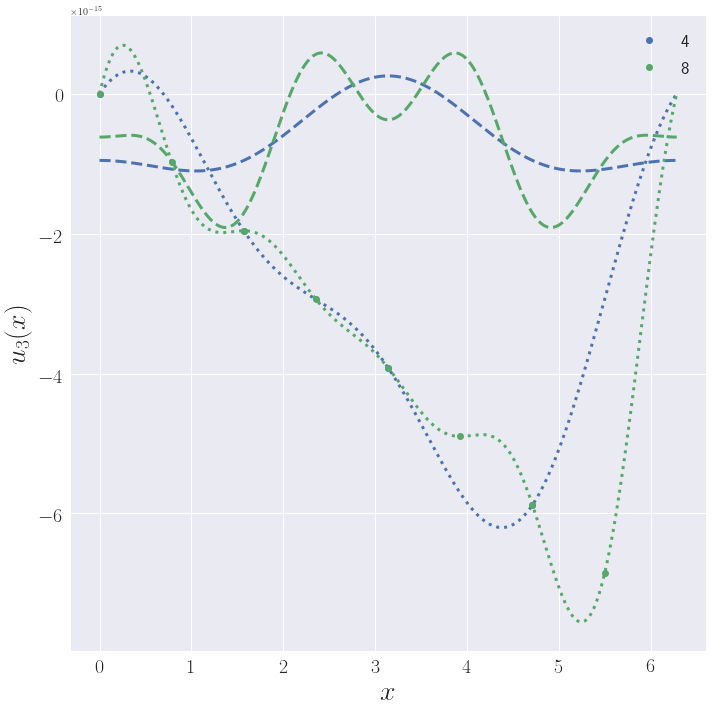

In [62]:
plot_function_interpolant_truncation_func3()

In [63]:
def calc_truncation_interpolation_errors_func3():

    Nvals = 2.0**arange(2,9)
    interpolation_error_array = zeros(Nvals.size)
    truncation_error_array = zeros(Nvals.size)

    # very fine grid for plotting
    fine_xj = linspace(0.0, 2*pi, 1000)

    for index, N in enumerate(Nvals):

        obj = q2b3(N=N)
        
        uj = func3(fine_xj)

        # compute the interpolant 
        In = (obj.fft_coeffs[:,None]*exp(1j*(obj.ks-1)[:,None]*fine_xj[None,:])).sum(axis=0)
        
        # compute the truncated fourier series
        Tn = (obj.integral_coeffs[:,None]*exp(1j*obj.ks[:,None]*fine_xj[None,:])).sum(axis=0)

        interpolation_error_array[index] = norm((uj-In).flatten(), ord=inf)
        truncation_error_array[index] = norm((uj-Tn).flatten(), ord=inf)
        
    fig, ax = subplots(1,1,figsize=(10,10))
    
    ax.plot(Nvals, interpolation_error_array, lw=3.0, label="Interpolation")
    ax.plot(Nvals, truncation_error_array, lw=3.0, label="Truncation")
    
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"$E(N)$", fontsize=28)
    ax.set_xlabel(r"$N$", fontsize=28)
    
    ax.tick_params(labelsize=24)
    
    ax.legend(loc=0, prop={"size":18})
    
    fig.tight_layout()
    
    fig.savefig("q2b_func3_trunc_interp_error_fig.pdf")

In [65]:
2.0**arange(2,9)

array([  4.,   8.,  16.,  32.,  64., 128., 256.])

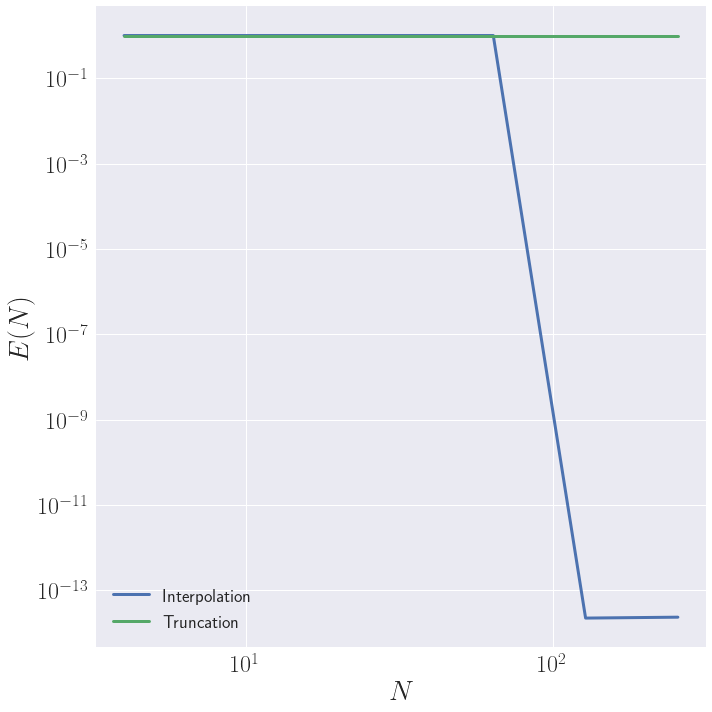

In [64]:
calc_truncation_interpolation_errors_func3()